# Exploring the Bitcoin Cryptocurrency Market

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Notebook attributes
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

In [3]:
# Read the CSV file into a DataFrame
dec6 = pd.read_csv('C:/Users/emssc/Python/Project 1_Bitcoin/coinmarketcap_06012018.csv')

# Select 'id' and  'market_cap_usd' 
market_cap_raw = dec6[['id','market_cap_usd']]

# Counting the number of values
market_cap_raw.count()

id                100
market_cap_usd    100
dtype: int64

In [4]:
# Filter out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

id                100
market_cap_usd    100
dtype: int64

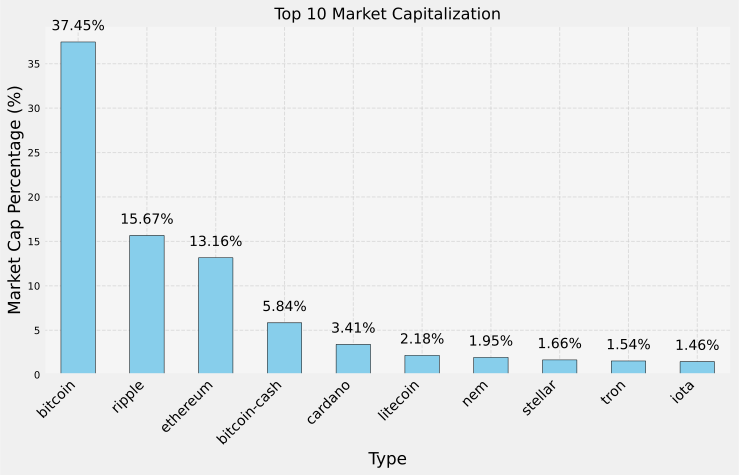

In [5]:
TOP_CAP_TITLE = 'Top 10 Market Capitalization'

# Select first 10 rows and set the index
cap10 = cap[:10].set_index('id')

# Calculate market_cap_perc
cap10 = cap10.assign(market_cap_perc=lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

# Define custom colors for bars
custom_colors = ['skyblue']

# Plot the barplot with custom customization
ax = cap10.market_cap_perc.plot.bar(
    title='TOP_CAP_TITLE',
    color=custom_colors,
    figsize=(11, 6),  # Adjust the figure size
    edgecolor='black',  # Add black borders to the bars
)

# Rotate the x-axis labels to 45 degrees
ax.set_xticklabels(cap10.index, rotation=45, ha="right")

# Annotating both axes
ax.set_ylabel('Market Cap Percentage (%)')
ax.set_xlabel('Type')

# Customize the gridlines
ax.grid(True, linestyle='--', alpha=0.6)

# Add data labels above each bar
for i, v in enumerate(cap10.market_cap_perc):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Add a background color to the plot area
ax.set_facecolor('whitesmoke')

# Add a title
ax.set_title("Top 10 Market Capitalization", fontsize=16)

# Customize the appearance of the y-axis ticks (e.g., adjust font size)
ax.tick_params(axis='y', labelsize=10)

# Show the plot
plt.show()


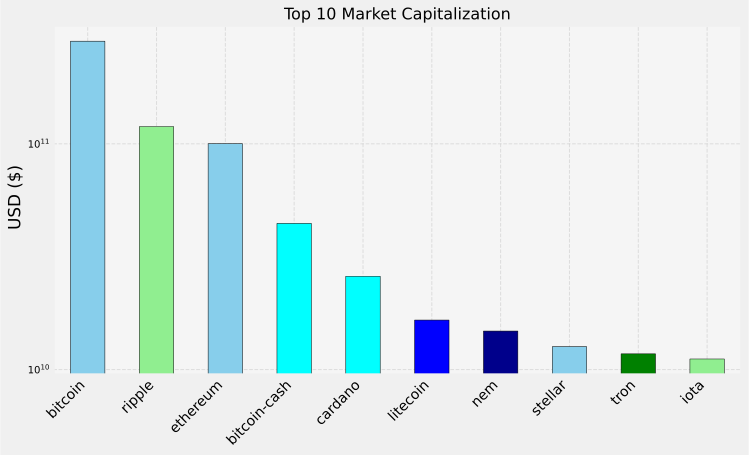

In [6]:
TOP_CAP_TITLE = 'Top 10 Market Capitalization'

# Select first 10 rows and set the index
cap10 = cap[:10].set_index('id')

# Calculate market_cap_perc
cap10 = cap10.assign(market_cap_perc=lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

# Define custom colors for bars
custom_colors = ['skyblue', 'lightgreen', 'skyblue', 'cyan', 'cyan', 'blue', 'darkblue', 'skyblue', 'green', 'lightgreen']

# Plot the barplot with custom customization
ax = cap10.market_cap_usd.plot.bar(
    title=TOP_CAP_TITLE, 
    logy=True, 
    figsize=(11, 6),  # Adjust the figure size
    edgecolor='black',  # Add black borders to the bars
    color = custom_colors)

# Rotate the x-axis labels to 45 degrees
ax.set_xticklabels(cap10.index, rotation=45, ha="right")

# Annotating both axes
ax.set_ylabel(' USD ($)')
ax.set_xlabel('')

# Customize the gridlines
ax.grid(True, linestyle='--', alpha=0.6)

# Add a background color to the plot area
ax.set_facecolor('whitesmoke')

# Add a title
ax.set_title("Top 10 Market Capitalization", fontsize=16)

# Customize the appearance of the y-axis ticks (e.g., adjust font size)
ax.tick_params(axis='y', labelsize=10)

# Show the plot
plt.show()

In [7]:
# Select the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Set the index to 'id' and drop all NaN rows
volatility = volatility.set_index('id').dropna()

# Sort the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Check the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
ardor,-20.83,2.76
tenx,-15.81,6.55
tron,-12.63,434.36
digixdao,-12.19,15.65
status,-11.95,201.88


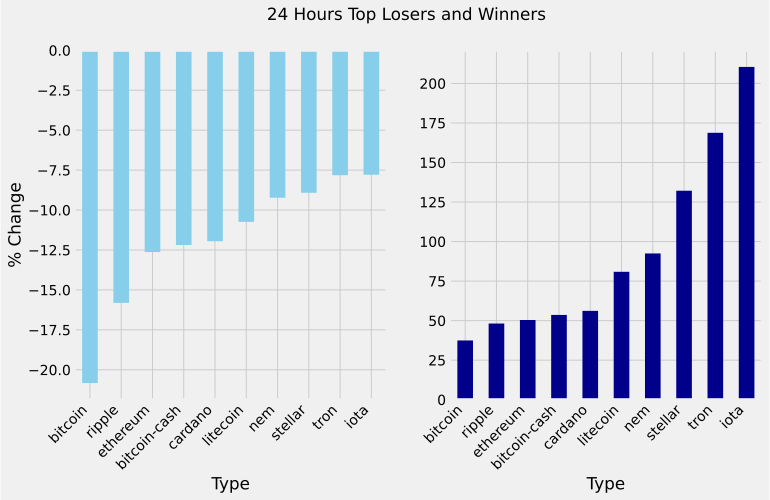

In [13]:
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))

    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="skyblue", ax=axes[0])

    # Setting the main title to TITLE
    fig.suptitle(title)

    # Rotate the x-axis labels to 45 degrees
    ax.set_xticklabels(cap10.index, rotation=45, ha="right")

    # Annotate the x axis
    ax.set_xlabel('Type')

    # Setting the ylabel to "% change"
    ax.set_ylabel('% Change')

    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])

    # Rotate the x-axis labels to 45 degrees
    ax.set_xticklabels(cap10.index, rotation=45, ha="right")

    # Annotate the x axis
    ax.set_xlabel('Type')

    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 Hours Top Losers and Winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

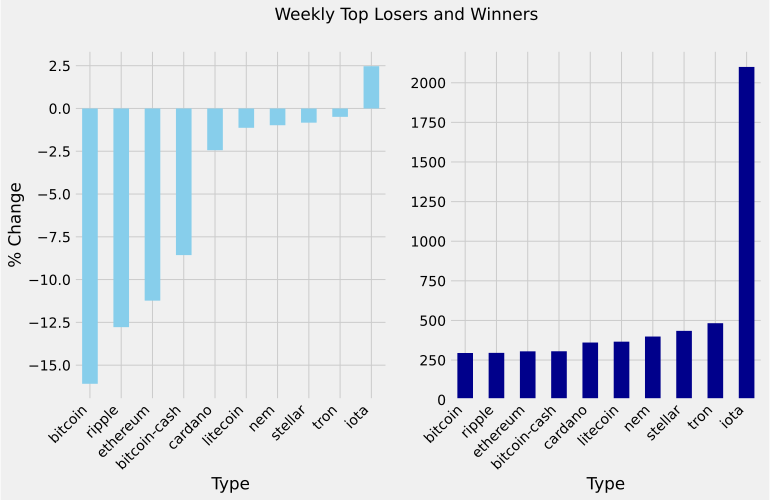

In [14]:
# Sorting percent_change_7d in ascending order
volatility7d = volatility.sort_values("percent_change_7d")

WTITLE = "Weekly Top Losers and Winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE);

In [10]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query("market_cap_usd > 1E+10")

# Printing out largecaps
largecaps

,id,market_cap_usd
0,bitcoin,2.849090e+11
1,ripple,1.192080e+11
2,ethereum,1.001150e+11
3,bitcoin-cash,4.442406e+10
4,cardano,2.591665e+10
5,litecoin,1.657402e+10
6,nem,1.481337e+10
7,stellar,1.263463e+10
8,tron,1.174164e+10
9,iota,1.114386e+10


### 9. Most coins are tiny

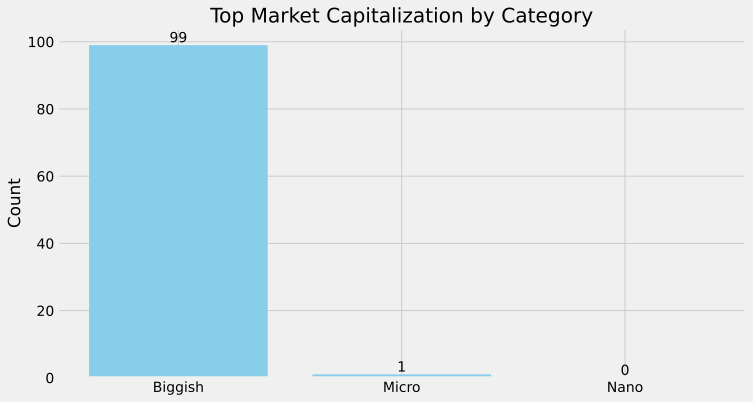

In [11]:
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["Biggish", "Micro", "Nano"]

# Use capcount count the not_so_small cryptos
biggish = capcount("market_cap_usd > 3E+8")

# Repeat for micro
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# Repeat for  nano
nano =  capcount("market_cap_usd < 5E+7")

# Make a list with the 3 counts
values = [biggish, micro, nano]

# Define custom colors for bars
custom_colors = ['skyblue']

# Set the figure size (e.g., 10x6)
plt.figure(figsize=(11, 6))

# Plot the barplot with custom customization
ax = plt.bar(range(len(values)), 
             values, 
             tick_label=LABELS, 
            color=custom_colors)

# Annotating the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Add a title to the plot
plt.title('Top Market Capitalization by Category')

# Add labels to the axis
plt.ylabel('Count')

# Show the plot
plt.show()